
<div style="text-align: center; color: white; background-color: #559cff; font-weight: bold; padding: 20px" >
 <p style="font-size: 40px"> Final Project - Programming for Data Science 📚</p>
 <p style="font-size: 25px"><u>Question 4:</u> In the top 5 artists with the highest number of streams on Spotify, what are the similarities and differences in the features of their songs?🔝</p>

</div>

---

## Member Information 👬
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of contents 📑
- [1.Question](#1-question) <br> 
    - [1.1 The purpose of the question](#11-the-purpose-of-the-question)<br>
    - [1.2 How to solve the question](#12-how-to-solve-the-question)
- [2. Solution](#2-solution) <br>
    - [2.1 Pre-processing data](#21-pre-processing-data)<br>
    - [2.2 Data analysis](#22-data-analysis)<br>
    - [2.3 Answer the question](#23-answer-the-question)<br>
---

## 1. Question

<p style="font-size: 20px;"><strong>🔝 In the top 5 artists with the highest number of streams on Spotify, what are the similarities and differences in the features of their songs?</strong></p>

### 1.1 The purpose of the question

✅ Answering this question will provide you with an overview of the `music styles`, `characteristics`, and `trends` of the top 5 most-streamed artists on `Spotify`. You can identify common and unique elements in their music. <br>
✅ By comparing features such as `danceability`, `valence`, `liveness`, `energy`, ..., you can uncover similarities and differences among the songs of these top artists. This helps you gain a better understanding of how these musical features impact the success and appeal of a song. <br>
✅ Top artists typically have a large audience, so analyzing their musical features provides insights into the musical preferences of the public. You can identify popular musical elements favored by listeners and apply that knowledge to create and distribute music effectively.

### 1.2 How to solve the question

- First, we need to identify the **top 5 artists** with the highest streaming numbers on `Spotify`. To do this, we will calculate the total stream count of the songs performed by each artist in the dataset. Then, we will sort them in descending order and select the top 5 artists with the **highest stream counts**.
- Next, we will analyze the features of the songs performed by these artists. To do this, we will calculate the `mean`, `minimum`, `maximum`, and `standard deviation` of these features. Then, we will visualize these features to observe the similarities and differences among the artists.
- Finally, we will provide observations and conclusions about the features in the songs as well as the musical styles of the `top 5 artists` with the highest streaming numbers on `Spotify`.

## 2. Solution

### 2.1 Pre-processing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [12]:
df = pd.read_csv('./data/processed_spotify-2023.csv')
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147.0,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48.0,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113.0,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100.0,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50.0,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


🕵️ We find the top 5 artists with the highest streaming numbers on `Spotify` by calculating the total stream count of the songs performed by each artist in the dataset. Then, we sort them in descending order and select the top 5 artists with the **highest stream counts**.

In [39]:
import warnings
warnings.filterwarnings("ignore", 'This pattern is interpreted as a regular expression, and has match groups')

# get names of all artists
all_artists = df['artist(s)_name'].str.split(', ', expand=True).stack().unique().tolist()
# use a dictionary to store the artist's names and their total streams
dict_artist = {}
for artist in all_artists:
    dict_artist[artist] = df[df['artist(s)_name'].str.contains(artist)]['streams'].sum()
# sort the dictionary by the total streams
top_artists = sorted(dict_artist.items(), key=lambda x: x[1], reverse=True)[:5]

In [40]:
top_artists

[('The Weeknd', 23403146440.0),
 ('Bad Bunny', 18817346344.0),
 ('Ed Sheeran', 15316587718.0),
 ('Taylor Swift', 13410656912.0),
 ('Harry Styles', 11608645649.0)]

✅ Top 5 artists with the highest streaming numbers on `Spotify`: `The Weeknd`, `Bad Bunny`, `Ed Sheeran`, `Taylor Swift` and `Harry Styles`.

### 2.2 Data analysis

🕵️ We will now compare 5 subsets of the `Spotify` dataset to highlight the differences or similarity between songs of top 5 artists with the highest streaming numbers on `Spotify`. To highlight them, we will compare `average`, `max`, `min` and `std` values of numeric columns, and see the evolution of the `proportion` of categorical values.

In [42]:
the_weeknd_df = df[df['artist(s)_name'].str.contains('The Weeknd')]
bad_bunny_df = df[df['artist(s)_name'].str.contains('Bad Bunny')]
ed_sheeran_df = df[df['artist(s)_name'].str.contains('Ed Sheeran')]
taylor_swift_df = df[df['artist(s)_name'].str.contains('Taylor Swift')]
harry_styles_df = df[df['artist(s)_name'].str.contains('Harry Styles')]

data = [the_weeknd_df, bad_bunny_df, ed_sheeran_df, taylor_swift_df, harry_styles_df]
labels = ['The Weeknd', 'Bad Bunny', 'Ed Sheeran', 'Taylor Swift', 'Harry Styles']

🕵️ We will compare the proportion of `C#` in their key songs. We choose `C#` because it is the most popular key in the dataset.

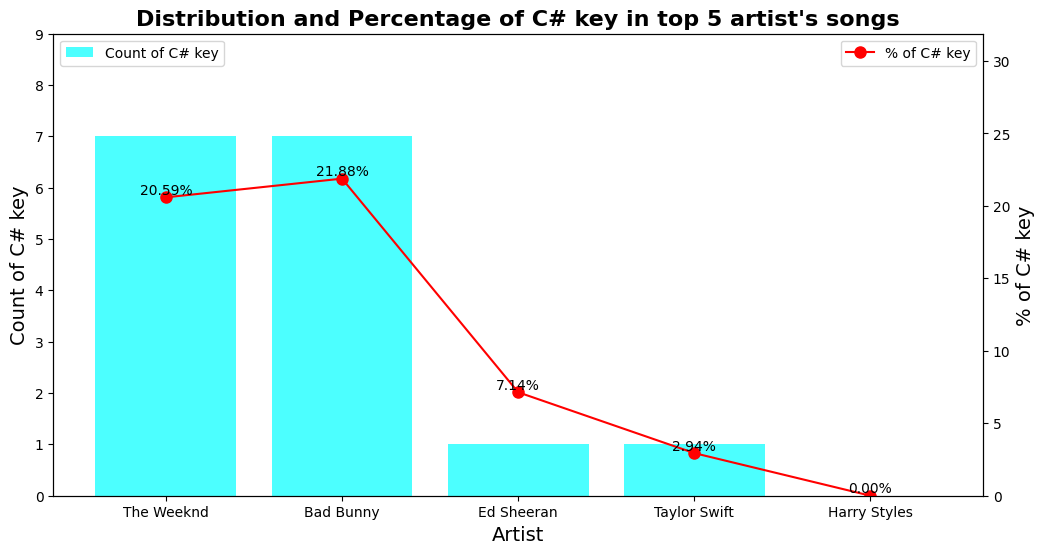

In [55]:
key_counts = []
key_percentages = []

for df in data:
    try:
        key_counts.append(df['key'].value_counts()['C#'])
        key_percentages.append(round(df['key'].value_counts()['C#']/len(df)*100, 2))
    except:
        key_counts.append(0)
        key_percentages.append(0)
    
fig, axe1 = plt.subplots(figsize=(12, 6))
axe1.bar(labels, key_counts, color='aqua', alpha=0.7, label='Count of C# key')
axe1.set_ylabel('Count of C# key', fontsize=14)
axe1.set_xlabel('Artist', fontsize=14)
axe1.set_title("Distribution and Percentage of C# key in top 5 artist's songs", fontsize=16, fontweight='bold')
axe1.set_ylim(0, max(key_counts) + 2)

axe2 = axe1.twinx()
axe2.plot(labels, key_percentages, color='red', marker='o', linestyle='-', markersize=8, label=f'% of C# key')
axe2.set_ylabel(f'% of C# key', fontsize=14)
axe2.set_ylim(0, max(key_percentages) + 10)

for i, percentage in enumerate(key_percentages):
    axe2.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom', fontsize=10)
    
axe1.legend(loc='upper left')
axe2.legend(loc='upper right')

plt.show()


✅ We can see that `The Weeknd` and `Bad Bunny` have the same high proportion of `C#` in their key songs. `Ed Sheeran` `Taylor Swift` and `Harry Styles` seem not to prefer `C#` in their key songs.

🕵️ Next we will compare the proportion of their `mode` songs. `Mode` is a feature that indicates the modality (`major` or `minor`) of a track, the type of scale from which its melodic content is derived. From this, we can know which `mode` they prefer.

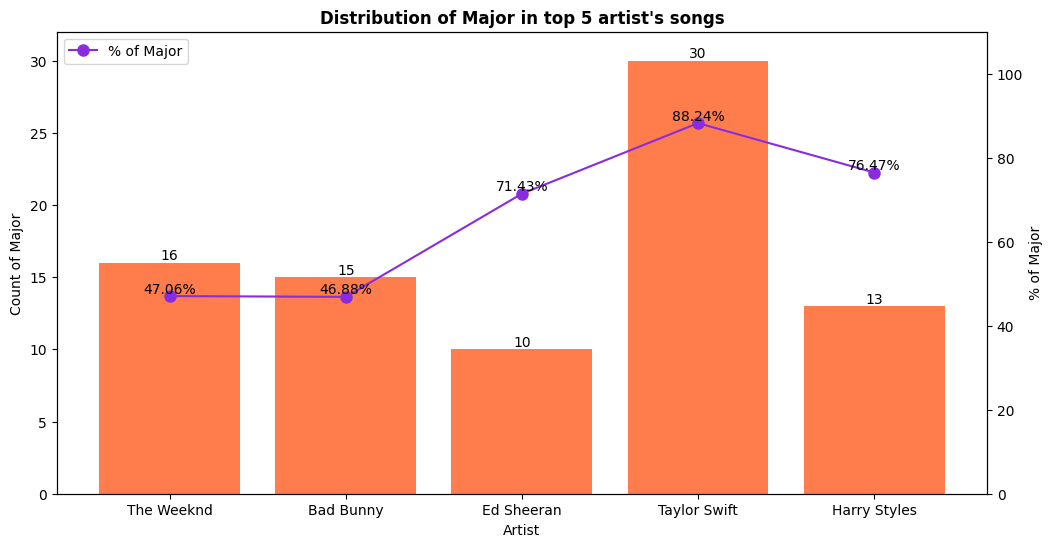

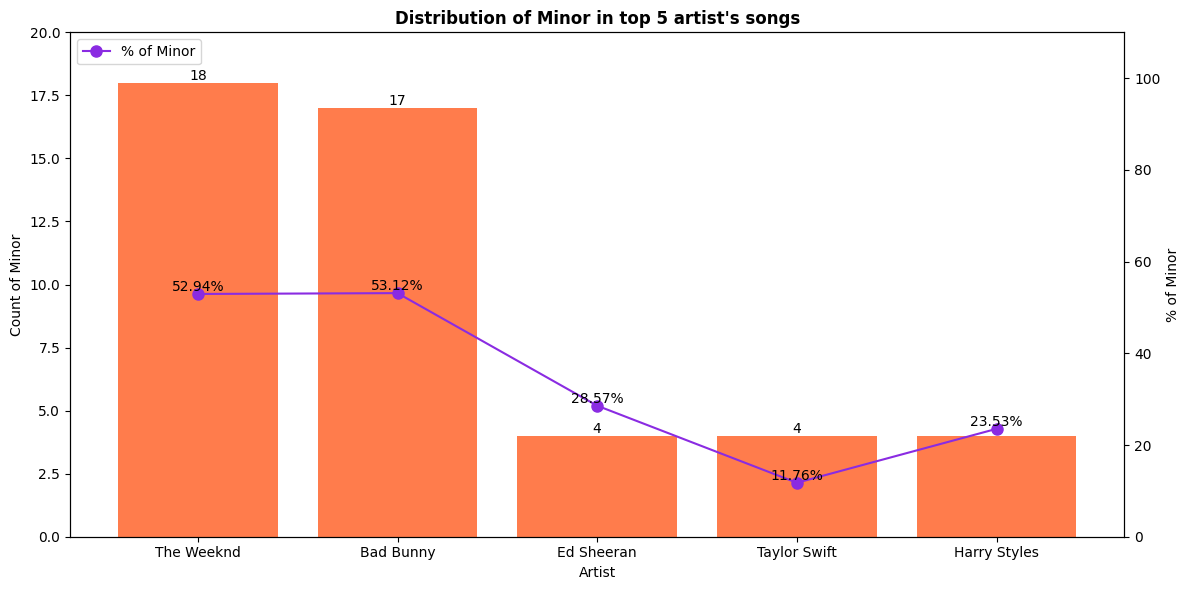

In [60]:
columns_of_mode = ['Major', 'Minor']
counts1 = {col: [] for col in columns_of_mode}

for df in data:
    count_1 = df['mode'].value_counts()['Major']
    counts1['Major'].append(count_1)
    counts1['Minor'].append(len(df) - count_1)
        
for col in columns_of_mode:
    plt.figure(figsize=(12, 6))
    
    plt.bar(labels, counts1[col], color='orangered', alpha=0.7, label=f'Count of {col} (1.0)')
    plt.xlabel('Artist')
    plt.ylabel(f'Count of {col}')
    plt.title(f"Distribution of {col} in top 5 artist's songs", fontweight='bold')
    plt.ylim(0, max(counts1[col]) + 2)

    for i, count in enumerate(counts1[col]):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10)
    
    plt.twinx()
    plt.plot(labels, [(count / len(df)) * 100 for count, df in zip(counts1[col], data)], 
             marker='o', color='blueviolet', linestyle='-', markersize=8, label=f'% of {col}')
    plt.ylabel(f'% of {col}')
    plt.ylim(0, 110)

    for i, count in enumerate(counts1[col]):
        plt.text(i, (count / len(data[i])) * 100, f'{(count / len(data[i])) * 100:.2f}%', 
                 ha='center', va='bottom', fontsize=10)
    
    plt.legend(loc='upper left')
    
plt.tight_layout()
plt.show()

✅ We can see that `The Weeknd` and `Bad Bunny` have the same high proportion of `major` and `minor` in their `mode` songs. `Ed Sheeran` `Taylor Swift` and `Harry Styles` seem not to prefer `manor` in their `mode` songs as they have a low proportion of `minor` in their `mode` songs (less than `30%`).

🕵️ Finaly, we will check their music features such as `bpm`, `danceability`, `valence`, `energy` and `speechiness`, to see the similarities and differences among the songs of these top artists.

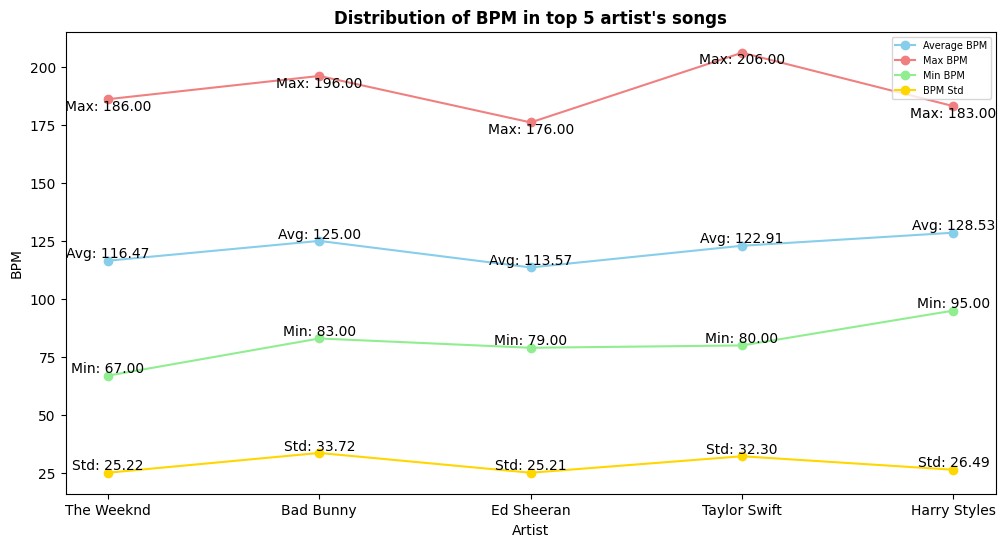

In [67]:
bpm_min = []
bpm_max = []
bpm_avg = []
bpm_std = []

for df in data:
    bpm_min.append(df['bpm'].min())
    bpm_max.append(df['bpm'].max())
    bpm_avg.append(df['bpm'].mean())
    bpm_std.append(df['bpm'].std())

plt.figure(figsize=(12, 6))

plt.plot(labels, bpm_avg, marker='o', linestyle='-', color='skyblue', label='Average BPM')
plt.plot(labels, bpm_max, marker='o', linestyle='-', color='lightcoral', label='Max BPM')
plt.plot(labels, bpm_min, marker='o', linestyle='-', color='lightgreen', label='Min BPM')
plt.plot(labels, bpm_std, marker='o', linestyle='-', color='gold', label='BPM Std')

plt.xlabel('Artist')
plt.ylabel('BPM')
plt.title("Distribution of BPM in top 5 artist's songs", fontweight='bold')

for i, (avg, max_val, min_val, std_val) in enumerate(zip(bpm_avg, bpm_max, bpm_min, bpm_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.legend(loc='upper right', fontsize=7)
plt.show()

✅All these 5 artists have a similar average `bpm` around `120`. `Harry Styles` has the highest average `bpm` while `Ed Sheeran` has the lowest average `bpm`. <br>
✅ `Std` of `bmp` of all 5 artists is quitle high, which means that they have a wide range of `bpm` in their songs. <br>
✅It is indicated that they prefer `bpm` around `120` in their songs and this will be a good `bpm` for a song to be popular. 

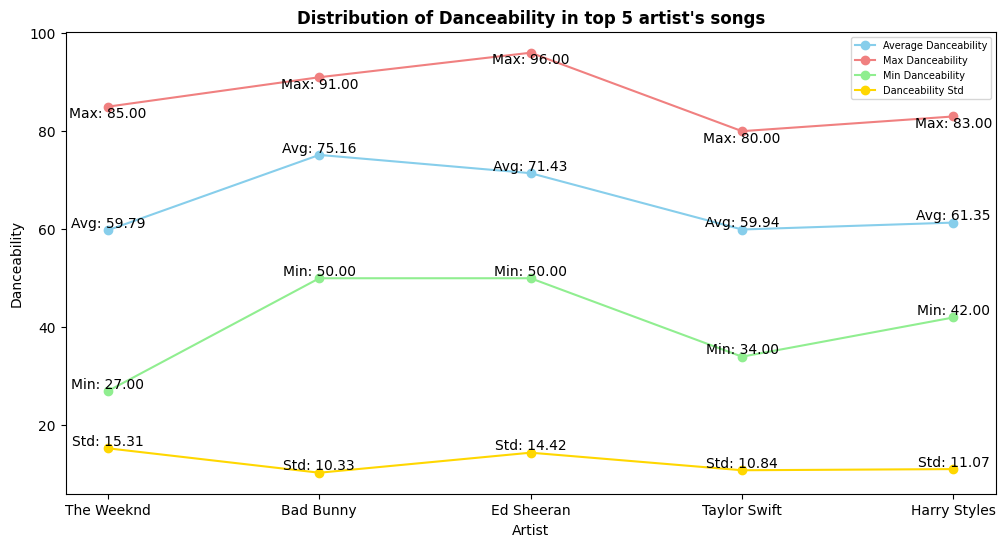

In [68]:
danceability_min = []
danceability_max = []
danceability_avg = []
danceability_std = []

for df in data:
    danceability_min.append(df['danceability_%'].min())
    danceability_max.append(df['danceability_%'].max())
    danceability_avg.append(df['danceability_%'].mean())
    danceability_std.append(df['danceability_%'].std())

plt.figure(figsize=(12, 6))

plt.plot(labels, danceability_avg, marker='o', linestyle='-', color='skyblue', label='Average Danceability')
plt.plot(labels, danceability_max, marker='o', linestyle='-', color='lightcoral', label='Max Danceability')
plt.plot(labels, danceability_min, marker='o', linestyle='-', color='lightgreen', label='Min Danceability')
plt.plot(labels, danceability_std, marker='o', linestyle='-', color='gold', label='Danceability Std')

plt.xlabel('Artist')
plt.ylabel('Danceability')
plt.title("Distribution of Danceability in top 5 artist's songs", fontweight='bold')

for i, (avg, max_val, min_val, std_val) in enumerate(zip(danceability_avg, danceability_max, danceability_min, danceability_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.legend(loc='upper right', fontsize=7)
plt.show()

✅All the song of these 5 artists have a very high average `danceability` (more than `50%`). <br>
✅`Ed Sheeran` seems to prefer `danceability` in his songs as he has the highest average `danceability` among these 5 artists. He has one song that its `danceability` is `96%` and his lowest `danceability` is `50%`. While `The Weeknd` has one song that its `danceability` is just `27%`.<br>
✅ This is indicated that songs with higher `danceability`, the more people will like them.

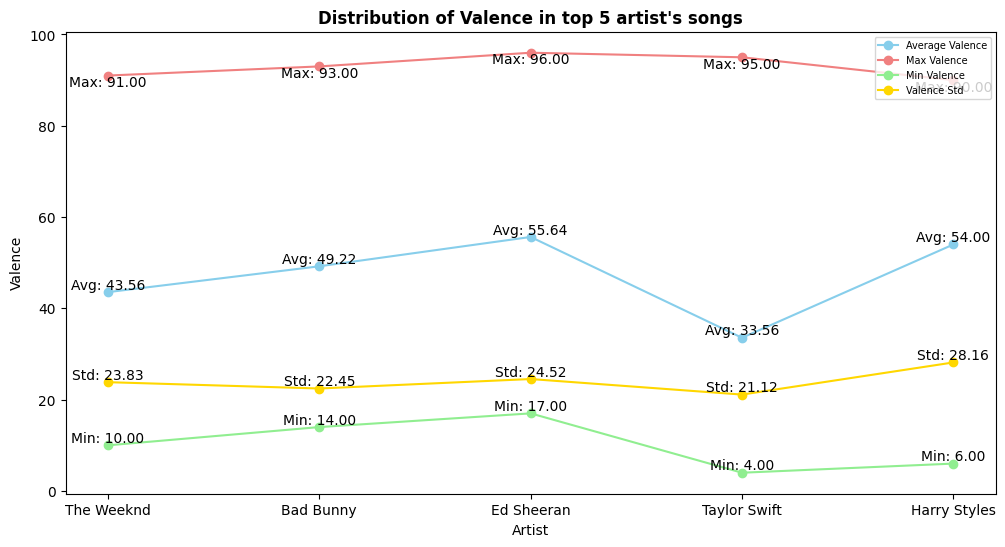

In [69]:
valence_min = []
valence_max = []
valence_avg = []
valence_std = []

for df in data:
    valence_min.append(df['valence_%'].min())
    valence_max.append(df['valence_%'].max())
    valence_avg.append(df['valence_%'].mean())
    valence_std.append(df['valence_%'].std())

plt.figure(figsize=(12, 6))

plt.plot(labels, valence_avg, marker='o', linestyle='-', color='skyblue', label='Average Valence')
plt.plot(labels, valence_max, marker='o', linestyle='-', color='lightcoral', label='Max Valence')
plt.plot(labels, valence_min, marker='o', linestyle='-', color='lightgreen', label='Min Valence')
plt.plot(labels, valence_std, marker='o', linestyle='-', color='gold', label='Valence Std')

plt.xlabel('Artist')
plt.ylabel('Valence')
plt.title("Distribution of Valence in top 5 artist's songs", fontweight='bold')

for i, (avg, max_val, min_val, std_val) in enumerate(zip(valence_avg, valence_max, valence_min, valence_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.legend(loc='upper right', fontsize=7)
plt.show()

✅Not like `danceability`, `valence` in these 5 artists' songs is not very high. `Ed Sheeran` has the highest average `valence` while `Taylor Swift` has the lowest average `valence`. Other artists have the average `valence` around `50%`. <br>
✅`Std` of `valence` of all 5 artists is quitle high, which means that they have a wide range of `valence` in their songs. <br>

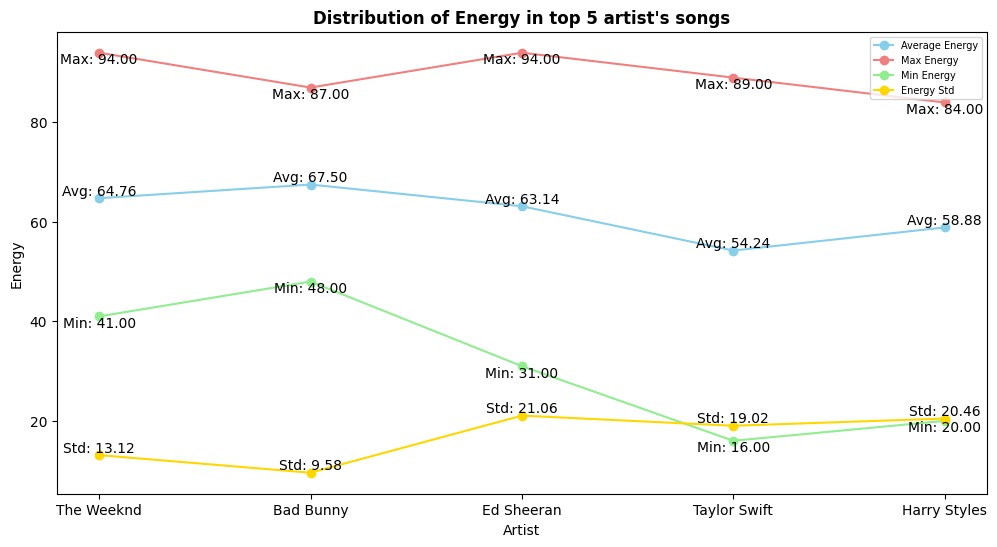

In [71]:
energy_min = []
energy_max = []
energy_avg = []
energy_std = []

for df_da in data:
    energy_min.append(df_da['energy_%'].min())
    energy_max.append(df_da['energy_%'].max())
    energy_avg.append(df_da['energy_%'].mean())
    energy_std.append(df_da['energy_%'].std())

plt.figure(figsize=(12, 6))

plt.plot(labels, energy_avg, marker='o', linestyle='-', color='skyblue', label='Average Energy')
plt.plot(labels, energy_max, marker='o', linestyle='-', color='lightcoral', label='Max Energy')
plt.plot(labels, energy_min, marker='o', linestyle='-', color='lightgreen', label='Min Energy')
plt.plot(labels, energy_std, marker='o', linestyle='-', color='gold', label='Energy Std')

plt.xlabel('Artist')
plt.ylabel('Energy')
plt.title("Distribution of Energy in top 5 artist's songs", fontweight='bold')

for i, (avg, max_val, min_val, std_val) in enumerate(zip(energy_avg, energy_max, energy_min, energy_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.legend(loc='upper right', fontsize=7)
plt.show()

✅The average `energy` of all 5 artists is around `60%`. `Bad Bunny` has the highest average `energy` while `Taylor Swift` has the lowest average `energy`. <br>
✅`Harry Styles` and `Taylor Swift` have the highest `std` of `energy` as they have a wide range of `energy` in their songs. <br>

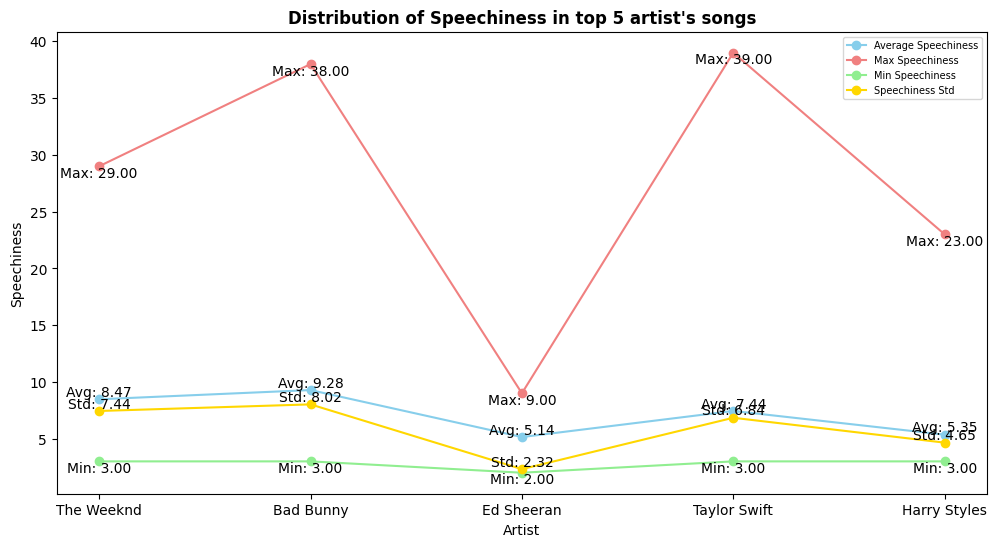

In [73]:
speechiness_min = []
speechiness_max = []
speechiness_avg = []
speechiness_std = []

for df in data:
    speechiness_min.append(df['speechiness_%'].min())
    speechiness_max.append(df['speechiness_%'].max())
    speechiness_avg.append(df['speechiness_%'].mean())
    speechiness_std.append(df['speechiness_%'].std())

plt.figure(figsize=(12, 6))

plt.plot(labels, speechiness_avg, marker='o', linestyle='-', color='skyblue', label='Average Speechiness')
plt.plot(labels, speechiness_max, marker='o', linestyle='-', color='lightcoral', label='Max Speechiness')
plt.plot(labels, speechiness_min, marker='o', linestyle='-', color='lightgreen', label='Min Speechiness')
plt.plot(labels, speechiness_std, marker='o', linestyle='-', color='gold', label='Speechiness Std')

plt.xlabel('Artist')
plt.ylabel('Speechiness')
plt.title("Distribution of Speechiness in top 5 artist's songs", fontweight='bold')

for i, (avg, max_val, min_val, std_val) in enumerate(zip(speechiness_avg, speechiness_max, speechiness_min, speechiness_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha='center', va='top', fontsize=10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.legend(loc='upper right', fontsize=7)
plt.show()

✅The `speechiness` of all 5 artists' songs is very low (less than `10%`). It is indicated that they prefer songs with less `speechiness` and people also like songs with less `speechiness`.

### 2.3 Answer the question

✅After analyzing the features of the songs performed by these artists, it seems that top 5 artists with highest `streams` on `Spotify` have somethings in common. If you want to create a song and want it to be the most popular possible, here are some guidelines you should follow to maximize your chances of success : <br>
- As we've seen throughout the analysis, the `C#` key is the most popular and most successful one for listeners. But not all artists prefer to use this key in their songs. `The Weeknd` and `Bad Bunny` have the same high proportion of `C#` in their key songs. `Ed Sheeran` `Taylor Swift` and `Harry Styles` seem not to prefer `C#` in their key songs.
- Using the `Major` mode is preferable, as it is the most popular and most successful mode on `Spotify`. All 5 artists have a high proportion of `Major` in their `mode` songs.
- `BPM` of all 5 artists' songs is around `120`. This is indicated that songs with `bpm` around `120` will be more popular.
- All the song of these 5 artists have a very high average `danceability` (more than `60%`). So your song needs to share a minimum of `danceability` to be among the most popular ones. A minimum of `60%` is recommended.
- Not like what we think `Positivity is the key, be positive in the song and it will have a higher chance of success`. `Valence` in these 5 artists' songs is not very high but their songs are still very popular. So `valence` is not a very important factor to make a song popular.
- The average `energy` of all 5 artists is around `60%`. So this means that songs with more `energy` will be more popular.
- The `speechiness` of all 5 artists' songs is very low (less than `10%`). It is indicated that nowadays people prefer songs with less `speechiness`, they prefer songs with more `rhythm` and `melody`.